# IMPALA Results

In [1]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [2]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [11]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[2]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200803-172924
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200727-113227
Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000 

Matchig xpid:  torchbeast-20200803-183002
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-165741
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-143954
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-160908
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-152318
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200724-153342
Map name:  CollectMineralShards
Batch size:  22
Total steps:  6000 

Matchig xpid:  torchbeast-20200803-155749
Map name:  CollectMineralShards
Batch size:  40
Total s

['torchbeast-20200803-172924',
 'torchbeast-20200727-113227',
 'torchbeast-20200803-183002',
 'torchbeast-20200803-165741',
 'torchbeast-20200803-143954',
 'torchbeast-20200803-160908',
 'torchbeast-20200803-152318',
 'torchbeast-20200724-153342',
 'torchbeast-20200803-155749',
 'torchbeast-20200725-204918',
 'torchbeast-20200803-171349',
 'torchbeast-20200803-145104']

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200731"
hms = "183523"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  24
Total steps:  120000
Learning rate:  0.0007
Entropy cost:  0.0005


## Loading logs

In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [7]:
logs = logs[logs['mean_episode_return'].notna()]

In [8]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.596210e+09,0,1387.690918,2.000000,1365.805298,22.131369,-0.245765
1,1,1.596210e+09,80,-10019.279297,0.727273,-10288.468750,269.437500,-0.247818
2,2,1.596210e+09,160,1253.029053,1.090909,1227.366455,25.905605,-0.243056
3,3,1.596210e+09,240,-3249.632812,0.000000,-3293.141602,43.753563,-0.244944
4,4,1.596210e+09,320,2598.478271,1.636364,2529.329590,69.389603,-0.241024
...,...,...,...,...,...,...,...,...
1493,1493,1.596214e+09,119440,96.436684,26.000000,-172.406433,268.843933,-0.000816
1495,1495,1.596214e+09,119600,-729.629639,26.000000,-880.732910,151.104126,-0.000826
1496,1496,1.596214e+09,119680,-185.611374,25.416668,-356.836792,171.226227,-0.000808
1498,1498,1.596214e+09,119840,-571.175049,25.083334,-702.125610,130.951355,-0.000812


In [9]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

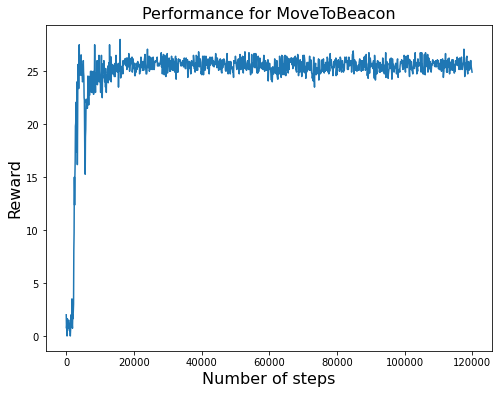

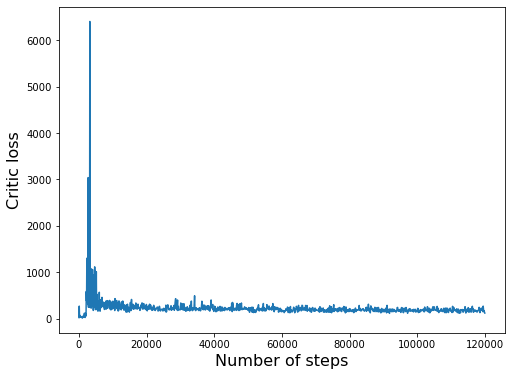

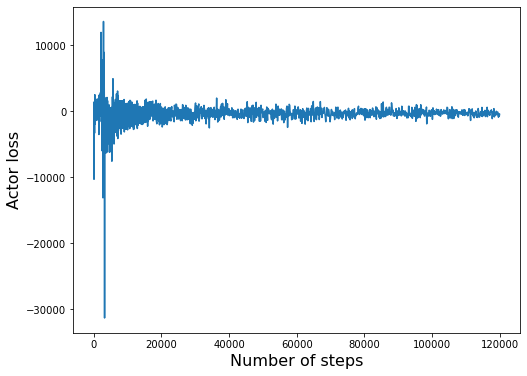

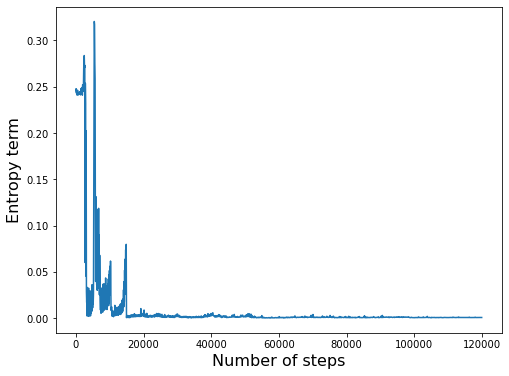

In [10]:
plot_IMPALA_session(results, map_name=flags['map_name'], moving_average=False, average_window=10)

In [11]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 25.61


# Search for periodic peaks in the critic loss

In [179]:
threshold = 4000
mask = (baseline_loss > threshold)
non_zero = mask.nonzero()[0]
tolerance = 30
x_min = non_zero[0]
centers = []
clusters = []
cluster_elems = []
for i in range(len(non_zero)):
    if (non_zero[i] - x_min) <= tolerance:
        cluster_elems.append(non_zero[i])
    else:
        clusters.append(cluster_elems)
        centers.append(np.mean(cluster_elems))
        cluster_elems = [non_zero[i]]
        x_min = non_zero[i]
        
centers = np.array(centers)
print("Clusters: \n", clusters, '\n')
print("Centers: \n", centers)

Clusters: 
 [[31, 32, 34, 37, 43, 49, 61], [67, 73, 79, 91, 97], [103, 130], [136, 142, 148, 154], [220, 226, 232, 238, 247, 250], [256, 265, 271, 277, 283], [289, 313], [322, 337], [355, 361, 367, 373, 385], [391, 403, 406], [470]] 

Centers: 
 [ 41.   81.4 116.5 145.  235.5 270.4 301.  329.5 368.2 400.  470. ]


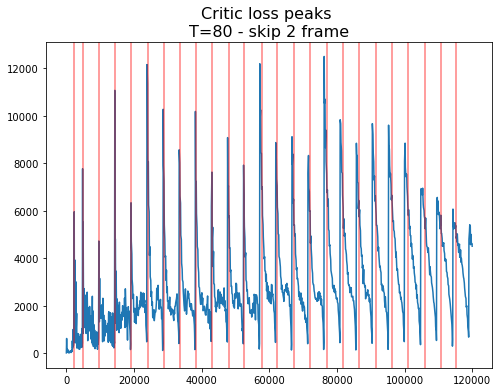

In [157]:
plt.figure(figsize = (8,6))
plt.title("Critic loss peaks \nT=80 - skip 2 frame", fontsize=16)
plt.plot(steps, baseline_loss)
T = flags['unroll_length']
for c in centers:
    plt.axvline(steps[int(c)], color='r', alpha=0.5)

In [156]:
distances = centers[1:] - centers[:-1] # measured in number of updates
# mask out outliers
mean = distances.mean()
std = distances.std()
mask = np.abs(distances - mean) > 3*std
print("Distances between centers: ", distances)
print("Outlier: ", mask)
distances = distances[~mask]
print("Filtered distances: ", distances)
print("Mean distance: %.2f +/- %.2f"%(distances.mean(), distances.std()/np.sqrt(len(distances)) ))

Distances between centers:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Outlier:  [False False False False False False False False False False False False
 False False False False False False False False False False False False]
Filtered distances:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Mean distance: 42.44 +/- 1.20


T = 80 -> mean distance 81.10 <br>
T = 60 -> mean distance 65.10; 60 (outlier manually counted off)

# MoveToBeacon

Target score: 26 (DeepMind)

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113216"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  40
Total steps:  120000
Learning rate:  0.0007
Entropy cost:  0.001


In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [7]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,1499.545532,0.000000,1466.273071,33.874214,-0.601849
1,1,1.595839e+09,60,-5738.138672,0.850000,-5828.133789,90.608040,-0.612637
3,3,1.595839e+09,180,-1795.953979,0.950000,-1857.742920,62.401550,-0.612698
5,5,1.595839e+09,300,149.728806,1.100000,107.573318,42.757256,-0.601759
7,7,1.595839e+09,420,443.243835,0.750000,406.204895,37.666275,-0.627312
...,...,...,...,...,...,...,...,...
1991,1991,1.595842e+09,119460,4302.445312,22.800001,-385.087494,4687.887695,-0.355162
1993,1993,1.595842e+09,119580,3690.619385,22.700001,-756.169739,4447.192871,-0.403908
1995,1995,1.595842e+09,119700,3497.805176,23.050001,-616.551392,4114.785156,-0.428634
1997,1997,1.595842e+09,119820,3404.897705,22.900000,-629.038635,4034.390137,-0.453797


In [8]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

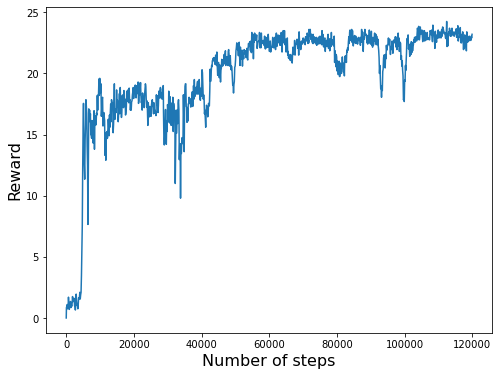

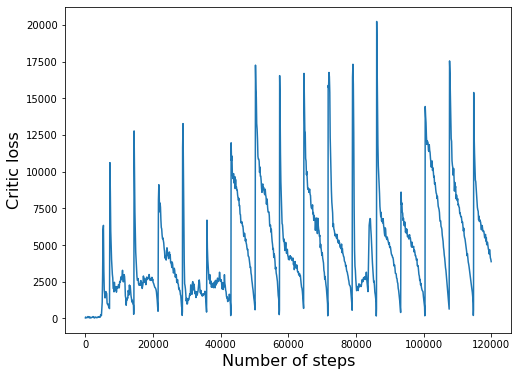

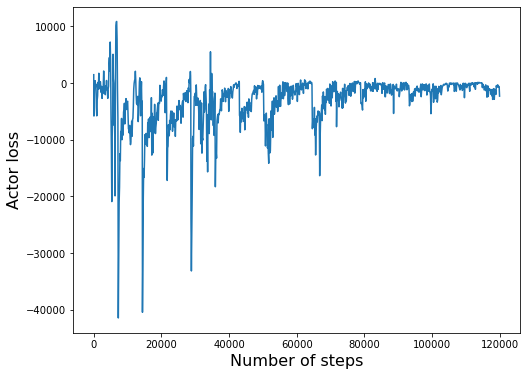

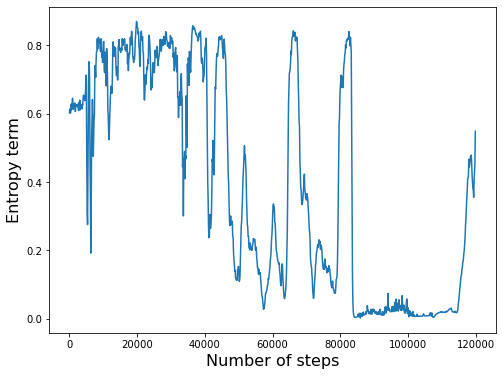

In [9]:
plot_IMPALA_session(results, moving_average=False, average_window=10)

In [10]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 23.06


# CollectMineralShards

Target score: 103 (DeepMind)

In [12]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113227"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [13]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000
Learning rate:  0.0007
Entropy cost:  0.001


In [14]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [15]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,37751.300781,0.0000,34985.847656,2766.064941,-0.614133
1,1,1.595839e+09,60,328.488678,20.8500,204.963623,124.096565,-0.571516
3,3,1.595839e+09,180,-93709.031250,19.2500,-114228.062500,20519.759766,-0.723839
5,5,1.595839e+09,300,-91407.242188,14.1000,-128399.343750,36992.574219,-0.474266
7,7,1.595839e+09,420,-73184.039062,21.6500,-95125.789062,21942.107422,-0.359841
...,...,...,...,...,...,...,...,...
59996,59996,1.595960e+09,3599760,678.620117,92.7500,-848.692627,1527.312744,-0.000005
59997,59997,1.595960e+09,3599820,2909.441406,94.1250,-1602.259033,4511.700684,-0.000166
59998,59998,1.595960e+09,3599880,695.686707,94.0000,-603.335266,1299.021973,-0.000013
59999,59999,1.595960e+09,3599940,2186.813721,94.8125,-579.902527,2766.716309,-0.000085


In [16]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

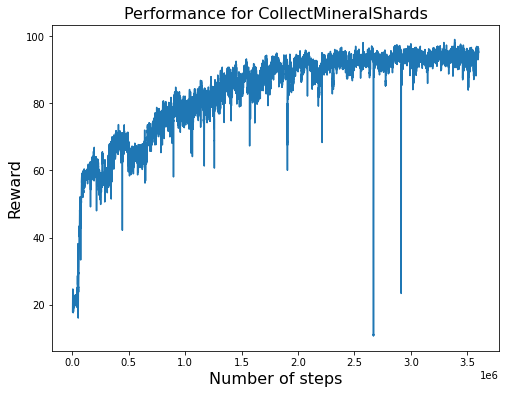

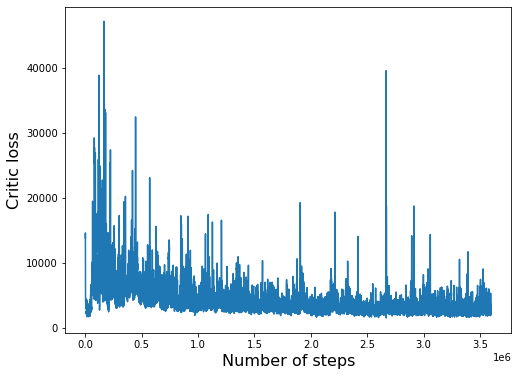

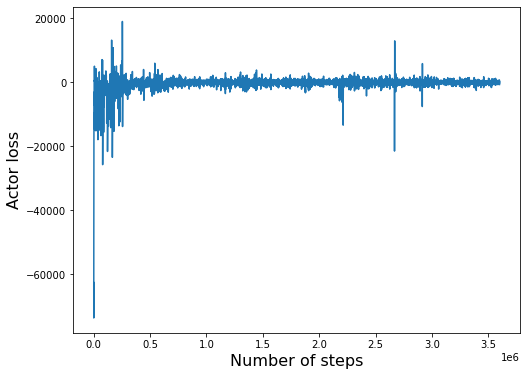

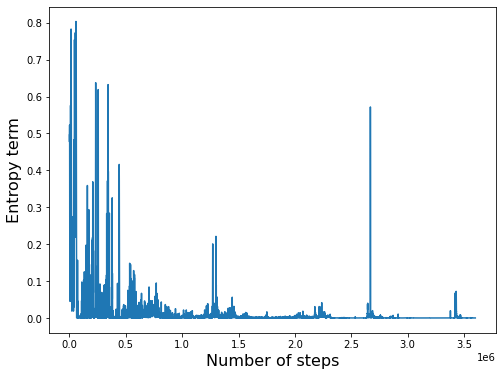

In [18]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=10)

In [17]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 94.52


# FindAndDefeatZerglings

Target score: 45 (DeepMind)

In [19]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113241"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [20]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  FindAndDefeatZerglings
Batch size:  40
Total steps:  3600000
Learning rate:  0.0007
Entropy cost:  0.001


In [21]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [22]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,14143.817383,-0.322581,13259.995117,884.416138,-0.594120
1,1,1.595839e+09,60,607.234985,4.000000,323.132355,284.700073,-0.597423
2,2,1.595839e+09,120,1432.054199,4.636364,1148.525635,284.125122,-0.596547
3,3,1.595839e+09,180,-6081.532715,10.500000,-6474.327637,393.401825,-0.606944
4,4,1.595839e+09,240,-10178.072266,7.444445,-11395.475586,1218.015869,-0.612094
...,...,...,...,...,...,...,...,...
59996,59996,1.595966e+09,3599760,3191.223389,46.500000,378.662659,2812.581543,-0.020848
59997,59997,1.595966e+09,3599820,2240.283936,38.000000,37.809776,2202.484863,-0.010623
59998,59998,1.595966e+09,3599880,3612.263672,38.833336,1102.608643,2509.676270,-0.021138
59999,59999,1.595966e+09,3599940,1483.005127,47.111111,-196.598755,1679.617432,-0.013512


In [23]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

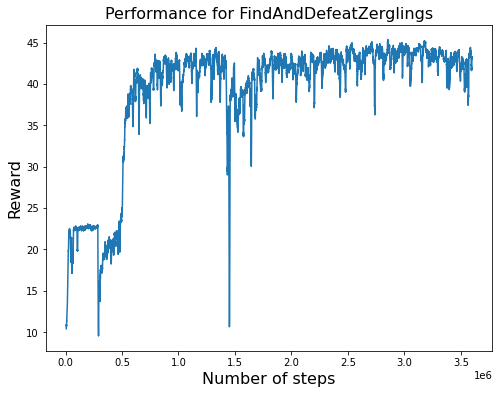

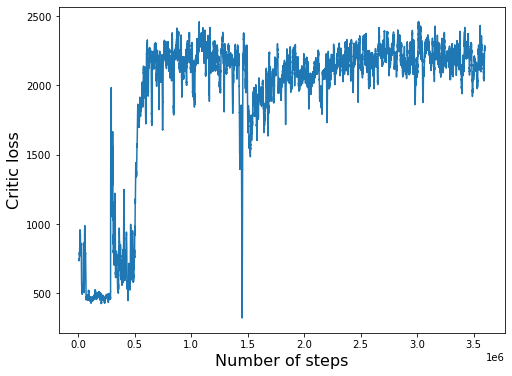

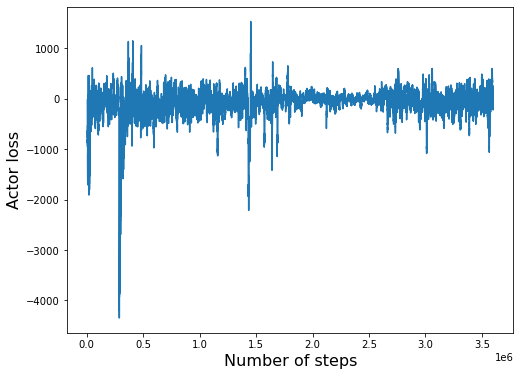

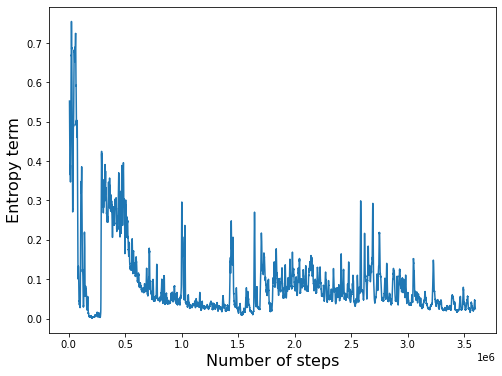

In [24]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [24]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 43.33
